In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
import seaborn as sns
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df=df.drop(columns='Cabin', axis=1)

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
most_frequent_embarked = df['Embarked'].mode()[0]
print(f"Most frequent value in 'Embarked': {most_frequent_embarked}")


Most frequent value in 'Embarked': S


In [10]:
df['Embarked'].fillna(most_frequent_embarked, inplace=True)


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

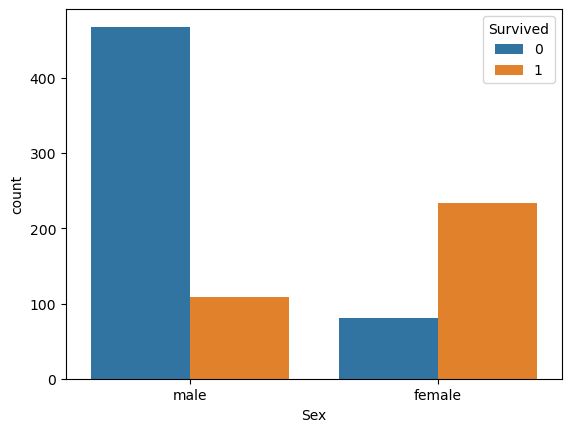

In [12]:
# Analysing Gender wise survivors
sns.countplot(x='Sex', hue='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

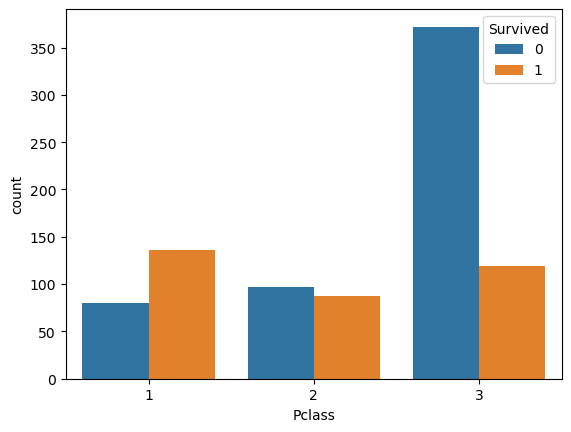

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [14]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [15]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [17]:
X = df.drop(columns = ['Survived'],axis=1)
Y = df['Survived']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [19]:
# Normalise
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = RandomForestClassifier()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
df_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', df_accuracy)

Accuracy score of training data :  0.9859550561797753


In [21]:
#check accuracy of test data
X_test_prediction = model.predict(X_test)



df_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data:', df_accuracy)


Accuracy score of test data: 0.7877094972067039


In [22]:
import joblib
# Save the trained Random Forest model

joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [23]:
!python -m pip show scikit-learn


Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\dell\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, scikit-learn-intelex


In [24]:
import sklearn
print(sklearn.__version__)


1.5.1
